In [257]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 250

# A 2D Demonstration

Here I walk through a 2D example presented in [arxiv:1003.3178](https://arxiv.org/abs/1003.3178).  The result of this demonstration is a figure similar to figure 2 in that paper.  

## Mock 2D Simulation

We begin with a unit square represented by edge vectors $u_1$ and $u_2$.

In [290]:
u1 = np.array([1,0])
u2 = np.array([0,1])

I also place some randoms points within this volume.

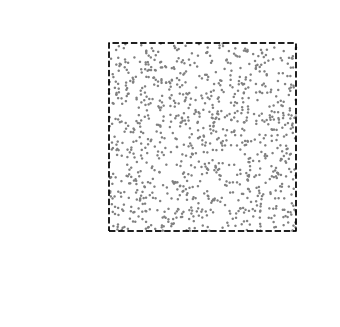

In [291]:
random_coords = np.random.random((1000,2))

fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(1.0,1.0))
fig.subplots_adjust(wspace=0.05, bottom=0.05, top=0.95, left=0.05, right=0.95)

# plot random points
ax.scatter(random_coords[:,0],random_coords[:,1],s=0.5, color='grey', edgecolors='none')

# plot unit square
patches = []
rect = mpatches.Rectangle([0,0], 1,1, linestyle='--', color='black', fill=None, lw=0.5)
patches.append(rect)
collection = PatchCollection(patches, match_original=True)
ax.add_collection(collection)

# format plot
ax.axis('off')
ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.1,1.1])

plt.show()

## Remapping

Now we define a shear matrix. 

In [277]:
m = 1
n = 1
u2_prime = np.array([m,1])
u1_prime = np.array([1+m*n,n])
m = np.vstack((u1_prime,u2_prime))

This matrix must be unimodular.  Here we confirm that $m$ satisifies this condition.

In [281]:
print("m is unimodular: ", (np.linalg.det(m)==1) | (np.linalg.det(m)==-1))

m is unimodular:  True


Now we can solve for the new edge vectors $e_1$ and $e_2$.

In [263]:
d12 = np.dot(u1_prime, u2_prime)
s1 = np.dot(u1_prime, u1_prime)
alpha = -1.0*d12/s1

e1 = u1_prime
e2 = u2_prime + alpha*u1_prime

## Plotting Transformation

Finally, we can plot the original unit cube, the first shear along the x-axis, the second shear along the y-axis, and finally, the squareing up.  In each panel, I have tiled the original square and points.

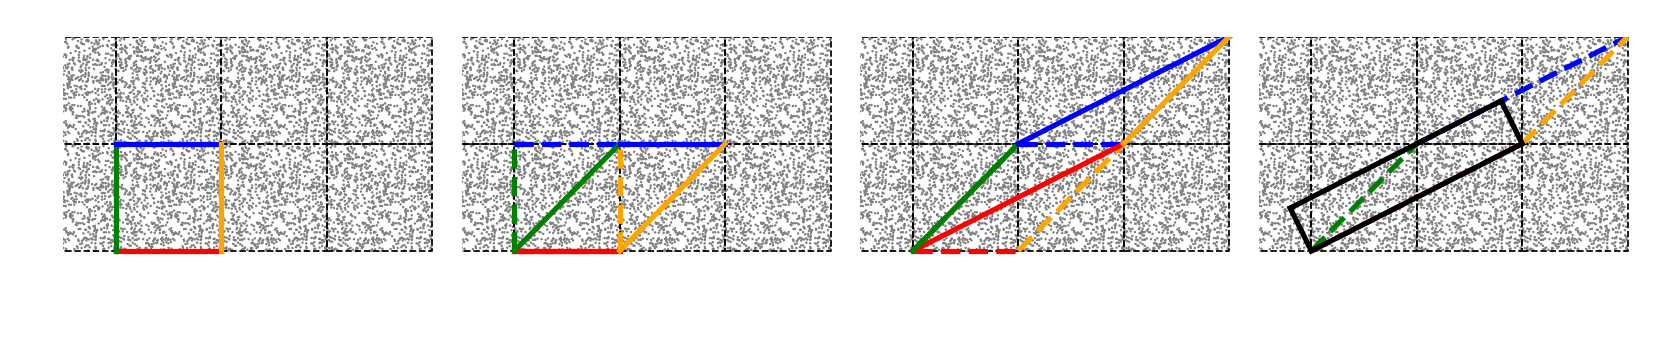

In [293]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

fig, axes = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(7, 1.0))
fig.subplots_adjust(wspace=0.05, bottom=0.05, top=0.95, left=0.05, right=0.95)

origins = [[-1,0],[0,0],[1,0],[2,0],[-1,1],[0,1],[1,1],[2,1]]
patches = []
for origin in origins:
    rect = mpatches.Rectangle(origin, 1,1, linestyle='--', color='black', fill=None, lw=0.5)
    patches.append(rect)

for ax in axes:
    ax.axis('off')
    for origin in origins:
        ax.scatter(random_coords[:,0]+origin[0], random_coords[:,1]+origin[1], s=0.5, color='grey', edgecolors='none')
    collection = PatchCollection(patches, match_original=True)
    ax.add_collection(collection)
    
ax = axes[0]
ax.plot([0,u1[0]], [0,u1[1]], color='red')
ax.plot([0,u2[0]], [0,u2[1]], color='green')
ax.plot([0,u1[0]], [0+u2[1],u1[1]+u2[1]], color='blue')
ax.plot([0+u1[0],u2[0]+u1[0]], [0,u2[1]], color='orange')

ax = axes[1]
ax.plot([0,u1[0]], [0,u1[1]], '--', color='red')
ax.plot([0,u2[0]], [0,u2[1]], '--',  color='green')
ax.plot([0,u1[0]], [0+u2[1],u1[1]+u2[1]], '--',  color='blue')
ax.plot([0+u1[0],u2[0]+u1[0]], [0,u2[1]], '--',  color='orange')

ax.plot([0,u1[0]], [0,u1[1]], color='red')
ax.plot([0,u2_prime[0]], [0,u2_prime[1]], color='green')
ax.plot([0+u2_prime[0],u1[0]+u2_prime[0]], [0+u2_prime[1],u1[1]+u2_prime[1]], color='blue')
ax.plot([0+u1[0],u2_prime[0]+u1[0]], [0+u1[1],u2_prime[1]+u1[1]], color='orange')

ax = axes[2]
ax.plot([0,u1[0]], [0,u1[1]], '--', color='red')
ax.plot([0,u2_prime[0]], [0,u2_prime[1]], '--', color='green')
ax.plot([0+u2_prime[0],u1[0]+u2_prime[0]], [0+u2_prime[1],u1[1]+u2_prime[1]], '--', color='blue')
ax.plot([0+u1[0],u2_prime[0]+u1[0]], [0+u1[1],u2_prime[1]+u1[1]], '--', color='orange')

ax.plot([0,u1_prime[0]], [0,u1_prime[1]], color='red')
ax.plot([0,u2_prime[0]], [0,u2_prime[1]], color='green')
ax.plot([0+u2_prime[0],u1_prime[0]+u2_prime[0]], [0+u2_prime[1],u1_prime[1]+u2_prime[1]], color='blue')
ax.plot([0+u1_prime[0],u2_prime[0]+u1_prime[0]], [0+u1_prime[1],u2_prime[1]+u1_prime[1]], color='orange')

ax.set_xlim([0,5])
ax.set_ylim([0,5])

ax = axes[3]

e1 = u1_prime
e2 = u2_prime + alpha*u1_prime

ax.plot([0,u1_prime[0]], [0,u1_prime[1]], '--', color='red')
ax.plot([0,u2_prime[0]], [0,u2_prime[1]], '--', color='green')
ax.plot([0+u2_prime[0],u1_prime[0]+u2_prime[0]], [0+u2_prime[1],u1_prime[1]+u2_prime[1]], '--', color='blue')
ax.plot([0+u1_prime[0],u2_prime[0]+u1_prime[0]], [0+u1_prime[1],u2_prime[1]+u1_prime[1]], '--', color='orange')

ax.plot([0,e1[0]], [0,e1[1]], color='black')
ax.plot([0,e2[0]], [0,e2[1]], color='black')
ax.plot([0+e2[0],e1[0]+e2[0]], [0+e2[1],e1[1]+e2[1]], color='black')
ax.plot([0+e1[0],e2[0]+e1[0]], [0+e1[1],e2[1]+e1[1]], color='black')

ax.set_xlim([-0.5,3.1])
ax.set_ylim([-0.1,2])

plt.show()

fig.savefig('2d_demo.png', dpi=250)

Below, I only plot the final remapped rectangle.  Note that each point only appears once in the final mapping.

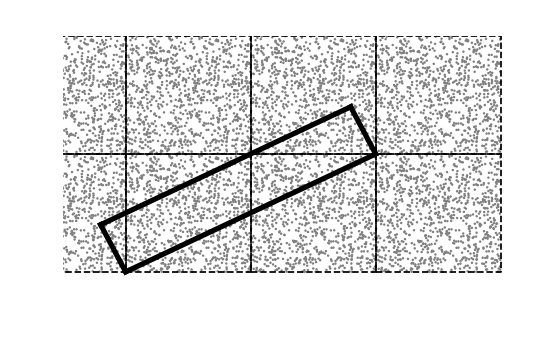

In [299]:
fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(2, 1.1))
fig.subplots_adjust(wspace=0.05, bottom=0.05, top=0.95, left=0.05, right=0.95)

origins = [[-1,0],[0,0],[1,0],[2,0],[-1,1],[0,1],[1,1],[2,1]]
patches = []
for origin in origins:
    rect = mpatches.Rectangle(origin, 1,1, linestyle='--', color='black', fill=None, lw=0.5)
    patches.append(rect)

ax.axis('off')
for origin in origins:
    ax.scatter(random_coords[:,0]+origin[0], random_coords[:,1]+origin[1], s=0.5, color='grey', edgecolors='none')
collection = PatchCollection(patches, match_original=True)
ax.add_collection(collection)

ax.plot([0,e1[0]], [0,e1[1]], color='black')
ax.plot([0,e2[0]], [0,e2[1]], color='black')
ax.plot([0+e2[0],e1[0]+e2[0]], [0+e2[1],e1[1]+e2[1]], color='black')
ax.plot([0+e1[0],e2[0]+e1[0]], [0+e1[1],e2[1]+e1[1]], color='black')

ax.set_xlim([-0.5,3.1])
ax.set_ylim([-0.1,2])

plt.show()

